# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

### What are the predictors and dependent variable ?

The dependent variable is admission to UCLA while the predictors are GRE, GPA, and prestige of the student's undergraduate school.

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

Admission to UCLA's graduate school is related to GRE and GPA. 

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

In [15]:
df_raw = pd.read_csv("admissions.csv")
df = df_raw.dropna() 
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [16]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


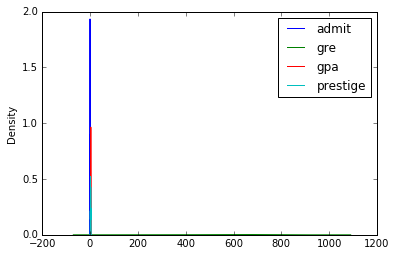

In [17]:
df.plot(kind= "density")

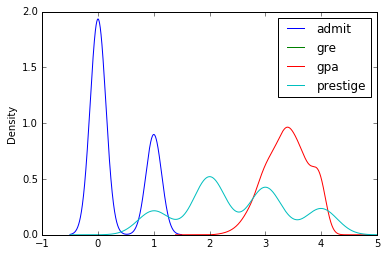

In [18]:
df.plot(kind= "density", xlim=(-1,5))

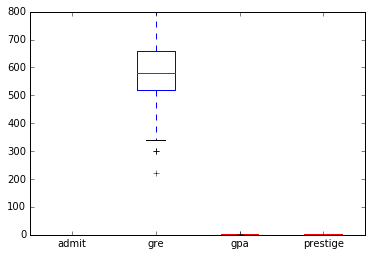

In [19]:
df.plot(kind= "box")

### FInd the correlation of each feature with admission

In [20]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


### How do you deal with the prestige feature?

Get dummies.

In [21]:
data = df.join(pd.get_dummies(df.prestige, prefix = 'prestige'))
data.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [22]:
# First scale the data
from sklearn import preprocessing as pp
from sklearn import linear_model as lm
features=[u'gre', u'gpa', u'prestige_1.0', u'prestige_2.0', u'prestige_3.0']
scaler = pp.StandardScaler().fit(data[features])
scaled_data = scaler.fit_transform(data[features])

In [23]:
from sklearn import grid_search
parameters = {'Cs':[i for i in range(1,10)], 'class_weight':['balanced',None], 'fit_intercept':[True,False]}
clf_lm = grid_search.GridSearchCV(lm.LogisticRegressionCV(), parameters, scoring='accuracy')
clf_lm.fit(scaled_data, data.admit)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'Cs': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'fit_intercept': [True, False], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [24]:
clf_lm.best_estimator_

LogisticRegressionCV(Cs=6, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [25]:
clf_lm.best_score_

0.7103274559193955

### What is the most important feature that contributes to the students probability of admission? 

In [26]:
#Solution code answer

zip(features, clf_lm.best_estimator_.coef_[0])

[(u'gre', 0.24478044649416111),
 (u'gpa', 0.27840354159571423),
 (u'prestige_1.0', 0.46347377814357349),
 (u'prestige_2.0', 0.3126964425956027),
 (u'prestige_3.0', 0.0095236918512411339)]

It looks like the most important feature that contributes to the students' probability of admission is having previously attended undergrad with a prestige ranking of 1.

In [53]:
#Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

# For those that were admitted, the probability of getting in if you had gone to a school with a prestige ranking of 1
data[data.admit==1]['prestige_1.0'].value_counts()/len(data[data.admit==1])

0.0    0.738095
1.0    0.261905
Name: prestige_1.0, dtype: float64

######################

I am confused by this. Does this mean of the people who were admitted, 26% of them went to an undergrad with a prestige ranking of 1? If so, it looks like those who went to an undergrad with a prestige ranking of 2 had a higher chance of getting into UCLA for grad school. This seems to contradict the findings above. 

######################

In [42]:
data[data.admit==1]['prestige_2.0'].value_counts()/len(data[data.admit==1])

0.0    0.579365
1.0    0.420635
Name: prestige_2.0, dtype: float64

In [41]:
data[data.admit==1]['prestige_3.0'].value_counts()/len(data[data.admit==1])

0.0    0.777778
1.0    0.222222
Name: prestige_3.0, dtype: float64

In [40]:
data[data.admit==1]['prestige_4.0'].value_counts()/len(data[data.admit==1])

0.0    0.904762
1.0    0.095238
Name: prestige_4.0, dtype: float64

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

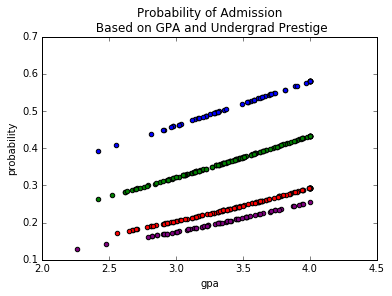

In [51]:
model = lm.LogisticRegression()
features = [i for i in data.columns if 'prestige_' in i]

features += ['gpa']
model.fit(data[features[1:]], df['admit'])

data['probability'] = model.predict_proba(data[features[1:]]).T[1]

ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    data[data[features[e]] == 1].plot(x='gpa', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Admission\n Based on GPA and Undergrad Prestige')

In [52]:
zip(features,colors)

[('prestige_1.0', 'blue'),
 ('prestige_2.0', 'green'),
 ('prestige_3.0', 'red'),
 ('prestige_4.0', 'purple')]

############################

### Practice

Decision Trees

/Users/suelee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


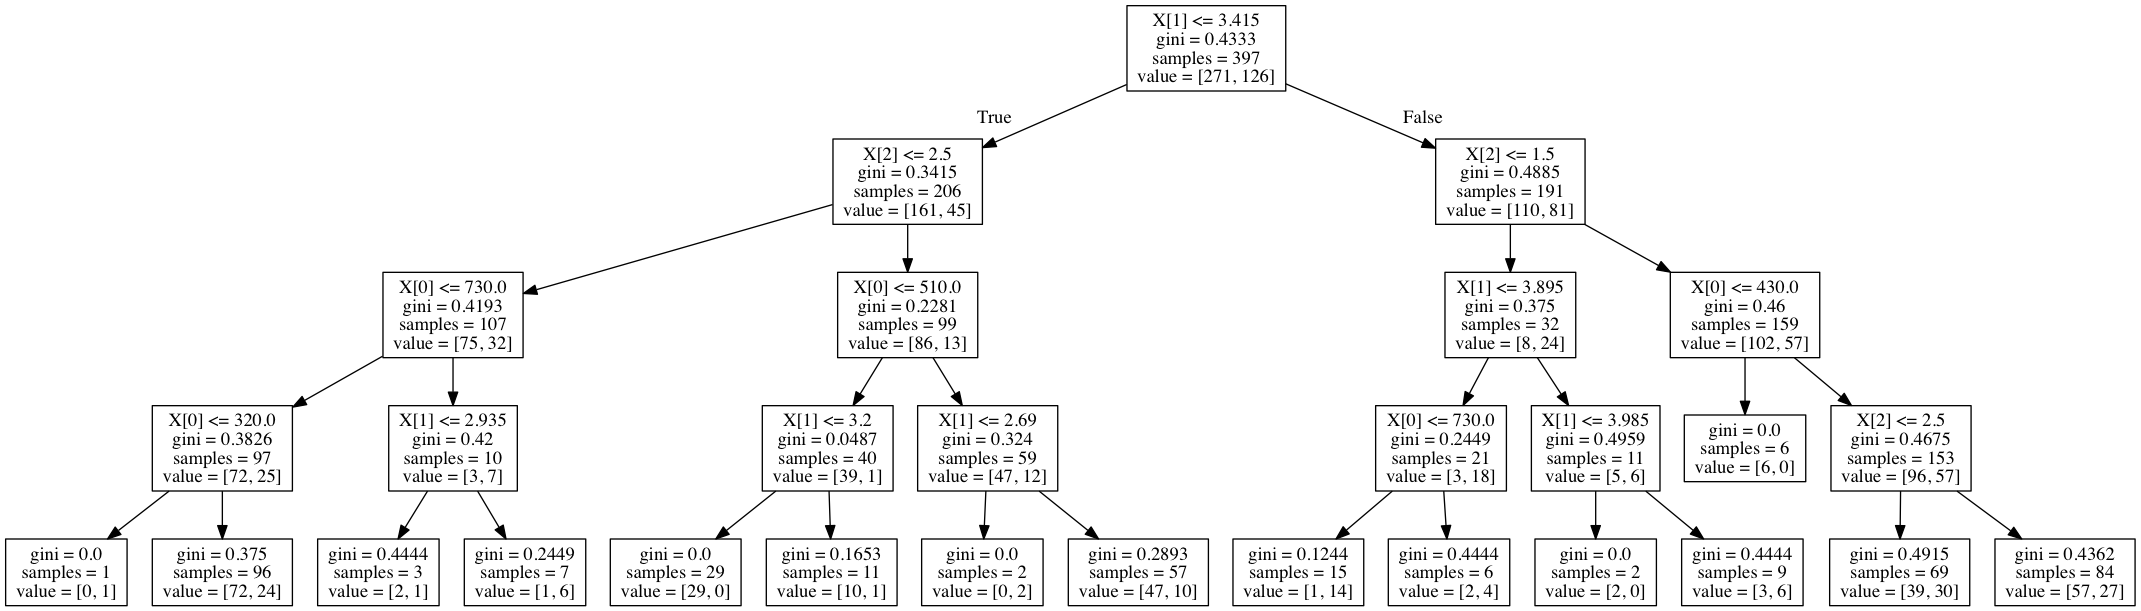

In [92]:
from sklearn import tree
from IPython.display import Image  
import pydotplus 
clf = tree.DecisionTreeClassifier(max_depth=4)
X = df[['gre', 'gpa', 'prestige', 'admit']]
Y = X['admit']   
X.drop('admit', axis=1, inplace=True)
clf = clf.fit(X, Y)

dot_data = tree.export_graphviz(clf)
graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
Image(graph.create_png())

############################


KNN

In [19]:
from sklearn import datasets, neighbors, metrics, grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
k = range(2, 100)
params = {'n_neighbors': k }
kf = cross_validation.KFold(len(df), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(df, df.admit)
gs.grid_scores_

[mean: 0.87406, std: 0.06513, params: {'n_neighbors': 2},
 mean: 0.89673, std: 0.04413, params: {'n_neighbors': 3},
 mean: 0.86398, std: 0.04059, params: {'n_neighbors': 4},
 mean: 0.88161, std: 0.03366, params: {'n_neighbors': 5},
 mean: 0.82620, std: 0.06960, params: {'n_neighbors': 6},
 mean: 0.82872, std: 0.06344, params: {'n_neighbors': 7},
 mean: 0.80353, std: 0.05619, params: {'n_neighbors': 8},
 mean: 0.81108, std: 0.05918, params: {'n_neighbors': 9},
 mean: 0.80856, std: 0.05372, params: {'n_neighbors': 10},
 mean: 0.80101, std: 0.08713, params: {'n_neighbors': 11},
 mean: 0.77582, std: 0.06739, params: {'n_neighbors': 12},
 mean: 0.77078, std: 0.07993, params: {'n_neighbors': 13},
 mean: 0.73552, std: 0.06675, params: {'n_neighbors': 14},
 mean: 0.74559, std: 0.05380, params: {'n_neighbors': 15},
 mean: 0.75819, std: 0.02920, params: {'n_neighbors': 16},
 mean: 0.77078, std: 0.03436, params: {'n_neighbors': 17},
 mean: 0.72796, std: 0.02340, params: {'n_neighbors': 18},
 mean

In [20]:
gs.best_params_

{'n_neighbors': 3}